In [1]:
# Import libraries
import pandas as pd
import numpy as nm

# Load csv into dataframes
calender_df= pd.read_csv('..\\data\\calendar.csv')

# Initial data lookup
def get_shape(df):
    print('The shape of the dataframe is : '+ str(df.shape))
    
def get_head(df, rows = 5):
    print("########################################################################")
    print(df.head(rows))

In [2]:
# Get Shape
get_shape(calender_df);

The shape of the dataframe is : (1393570, 4)


In [3]:
# Get head
get_head(calender_df);

########################################################################
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [4]:
# Missing Values
def get_missing_values_by_column(df):
    all_cols = df.columns.values
    print(all_cols)
    for col in all_cols:
        missing_percent = df[col].isnull().mean()
        if missing_percent > 0:
            print("Column " + col + " has " + str(float("{0:.2f}".format(missing_percent * 100))) + "% missing values" )
            
get_missing_values_by_column(calender_df)

['listing_id' 'date' 'available' 'price']
Column price has 32.94% missing values


In [5]:
# Replace t and f in 'available' coulnm by 1 and 0 repsp to count 
calender_df['available'].replace(['t','f'],[1,0],inplace=True)

#Replace NaNs in price ccolumn by 0
calender_df.fillna(value=0,inplace=True)


In [6]:
print(calender_df.head())
series_cal = calender_df.groupby(['listing_id'])['available'].sum() == 365
cal = series_cal.reset_index()
never_occupied_estate = cal[cal['available']].listing_id.values

   listing_id        date  available   price
0      241032  2016-01-04          1  $85.00
1      241032  2016-01-05          1  $85.00
2      241032  2016-01-06          0       0
3      241032  2016-01-07          0       0
4      241032  2016-01-08          0       0


In [7]:
never_occupied_estate

array([    4291,     6606,     9419,    10385,    10695,    11012,
          11411,    26116,    51826,    52525,    66540,    74328,
          80188,    82763,    84030,    86185,   103908,   103920,
         108468,   132120,   149489,   170273,   176678,   178844,
         180939,   202251,   210316,   215954,   254340,   264829,
         265901,   278192,   278830,   286712,   299817,   320704,
         338091,   354453,   387078,   387079,   392140,   408526,
         413733,   430453,   443942,   447523,   449602,   492287,
         496074,   529090,   555182,   555858,   571640,   571651,
         604600,   607788,   609252,   609421,   611500,   613151,
         637326,   649243,   670009,   685600,   692080,   696004,
         716829,   723723,   746380,   752483,   788146,   789966,
         796594,   808811,   830948,   942490,   955506,   973859,
        1002835,  1060467,  1063855,  1097766,  1123977,  1136522,
        1145590,  1190224,  1190571,  1246809,  1251707,  1251

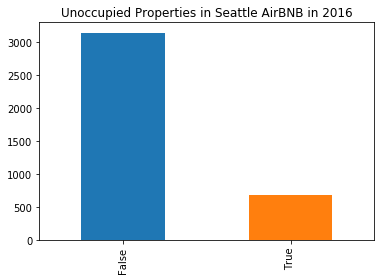

In [16]:
import matplotlib.pyplot as plt

cal['available'].value_counts().plot(kind='bar', title = 'Unoccupied Properties in Seattle AirBNB in 2016');